# Maximum Likelihood Estimation

## What is MLE?
 Parameters are not always known, prompting us to estimate them, like it was in linear regression. However, linear relationships are not always suitable for models, so we turn to estimation methods like Maximum Likelihood Estimation (MLE). MLE is a method to figure out the best guess for unknown parameters in a statistical model based on observed data, helping us estimate values we don't initially know.This approach offers greater flexibility in capturing the probabilistic relationships between variables than linear regression.

<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:497/1*QGIqfYif8nYpULr2siDDNw.png" />
</p>

In [12]:
############################################################################
#hide-input
# {
#     "tags": [
#         "remove-input"
#     ]
# }

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from numpy import exp
from scipy.special import factorial
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.api import Poisson
from scipy.stats import norm
from statsmodels.iolib.summary2 import summary_col

In [13]:
# import nbformat as nbf
# from glob import glob

# # Collect a list of all notebooks in the content folder
# notebooks = glob("/Users/zamanbeknuridinov/Downloads/mybook1/notebooks.ipynb", recursive=True)

# # Text to look for in adding tags
# text_search_dict = {
#     "# HIDDEN": "remove-cell",  # Remove the whole cell
#     "# NO CODE": "remove-input",  # Remove only the input
#     "# HIDE CODE": "hide-input"  # Hide the input w/ a button to show
# }

# # Search through each notebook and look for the text, add a tag if necessary
# for ipath in notebooks:
#     ntbk = nbf.read(ipath, nbf.NO_CONVERT)

#     for cell in ntbk.cells:
#         cell_tags = cell.get('metadata', {}).get('tags', [])
#         for key, val in text_search_dict.items():
#             if key in cell['source']:
#                 if val not in cell_tags:
#                     cell_tags.append(val)
#         if len(cell_tags) > 0:
#             cell['metadata']['tags'] = cell_tags

#     nbf.write(ntbk, ipath)
print(5+5)

{
    "tags": [
        "hide-input"
    ]
}

10


{'tags': ['hide-input']}

The likelihood of the dataset $D = (X, y) = \{(x_i, y_i)\}_{i=1}^{n}$ is
$$
p(y | X, w).
$$

If the samples $(x_i, y_i)$ are i.i.d., then
$$
p(y | X, w) = \prod_{i=1}^{n} p(y_i | x_i, w)
$$

The optimal weights $ \hat{w} $ maximize the likelihood, or, equivalently, log-likelihood:

$$
\tag{1}
\log p(y | X, w) = \log \prod_{i=1}^{n} p(y_i | x_i, w) = \sum_{i=1}^{n} \log p(y_i | x_i, w) \rightarrow \max_{w}
$$

Alternatively, one can minimize negative log-likelihood (NLL):

$$
-\log p(y | X, w) = -\sum_{i=1}^{n} \log p(y_i | x_i, w) \rightarrow \max_{w}
$$

The optimal estimation of weights $ \hat{w} $ maximizing log-likelihood [(1)](#1) is called maximum likelihood estimation (MLE).

```{admonition} What is the first step with MLE?
:class: dropdown

Identify which parametric class of distributions is generating the data.
Each such class is a family of distributions indexed by a finite number of parameters.
```

We’ll let the data pick out a particular element of the class by pinning down the parameters. The parameter estimates so produced will be called **maximum likelihood estimates**.

**Counting Billionaires**

Let's illustrate maximum likelihood by replicating Daniel Treisman’s (2016) paper, Russia’s Billionaires, which connects the number of billionaires in a country to its economic characteristics.

The number of billionaires is integer-valued. One integer distribution is the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).

<span style="display:none" id="quiz_mle_poisson">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgUHJvYmFiaWxpdHkgTWFzcyBGdW5jdGlvbiAoUE1GKSBvZiBhIFBvaXNzb24tZGlzdHJpYnV0ZWQgcmFuZG9tIHZhcmlhYmxlPyIsICJ0eXBlIjogIm1hbnlfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiJCRQKFggPSBrIHwgXFxsYW1iZGEpID0gXFxmcmFje2Veey1cXGxhbWJkYX0gXFxsYW1iZGFea317ayF9JCQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISBTb21lb25lIGtub3dzIHRoZWlyIHdheSBhcm91bmQgc3RhdGlzdGljcy4ifSwgeyJhbnN3ZXIiOiAiJCRmKHggfCBcXGxhbWJkYSkgPSBcXGxhbWJkYSBlXnstXFxsYW1iZGEgeH0kJCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QuIFRoaXMgaXMgdGhlIFByb2JhYmlsaXR5IERlbnNpdHkgRnVuY3Rpb24gKFBERikgb2YgYW4gRXhwb25lbnRpYWwgZGlzdHJpYnV0aW9uLCBub3QgUG9pc3Nvbi4ifSwgeyJhbnN3ZXIiOiAiJCRQKFggPSBrIHwgcCkgPSBwKDEtcCleayQkIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhpcyBpcyB0aGUgUE1GIG9mIGEgR2VvbWV0cmljIGRpc3RyaWJ1dGlvbiwgbm90IFBvaXNzb24uIn0sIHsiYW5zd2VyIjogIiQkZih4IHwgXFxtdSwgXFxzaWdtYSkgPSBcXGZyYWN7MX17XFxzcXJ0ezJcXHBpXFxzaWdtYV4yfX1lXnstXFxmcmFjeyh4LVxcbXUpXjJ9ezJcXHNpZ21hXjJ9fSQkIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhpcyBpcyB0aGUgUERGIG9mIGEgTm9ybWFsIChHYXVzc2lhbikgZGlzdHJpYnV0aW9uLCBub3QgUG9pc3Nvbi4ifV19XQ==</span>

In [14]:
from jupyterquiz import display_quiz
display_quiz("#quiz_mle_poisson")

<IPython.core.display.Javascript object>

Plot the Poisson distribution over $ y $ for different values of $ \mu $ as follows:

In [15]:
poisson_pmf = lambda y, μ: μ**y / factorial(y) * exp(-μ)
y_values = range(0, 25)

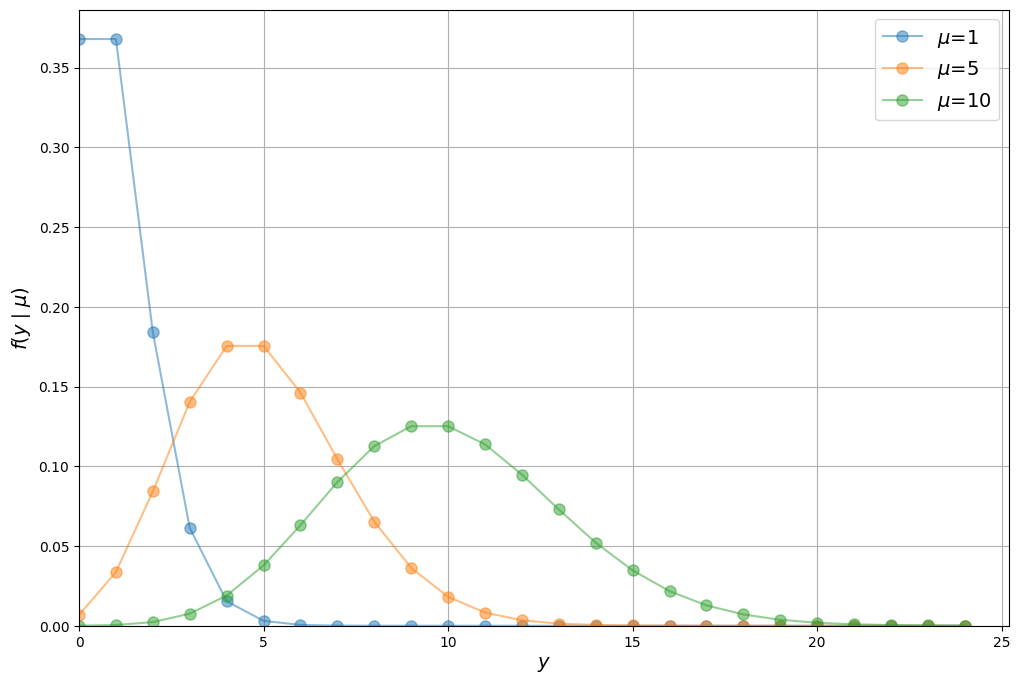

In [16]:
###############################################################

fig, ax = plt.subplots(figsize=(12, 8))

for μ in [1, 5, 10]:
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, μ))
    ax.plot(y_values,
            distribution,
            label=f'$\mu$={μ}',
            alpha=0.5,
            marker='o',
            markersize=8)

ax.grid()
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$f(y \mid \mu)$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

Notice that the Poisson distribution begins to resemble a normal distribution as the mean of $ y $ increases.

Let’s have a look at the distribution of the Treisman’s data.

In [17]:
# pd.options.display.max_columns = 10
# df = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/mle/fp.dta?raw=true')
# df.head()

import requests
import pyreadstat

url = 'https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/mle/fp.dta?raw=true'

def download_file(url):
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    return local_filename

# download_file(url)

df, meta = pyreadstat.read_dta(download_file(url))

Using a histogram, view the distribution of the number of
billionaires per country, `numbil0`, in 2008 (the United States is
dropped for plotting purposes)

In [18]:
numbil0_2008 = df[(df['year'] == 2008) & (
    df['country'] != 'United States')].loc[:, 'numbil0']

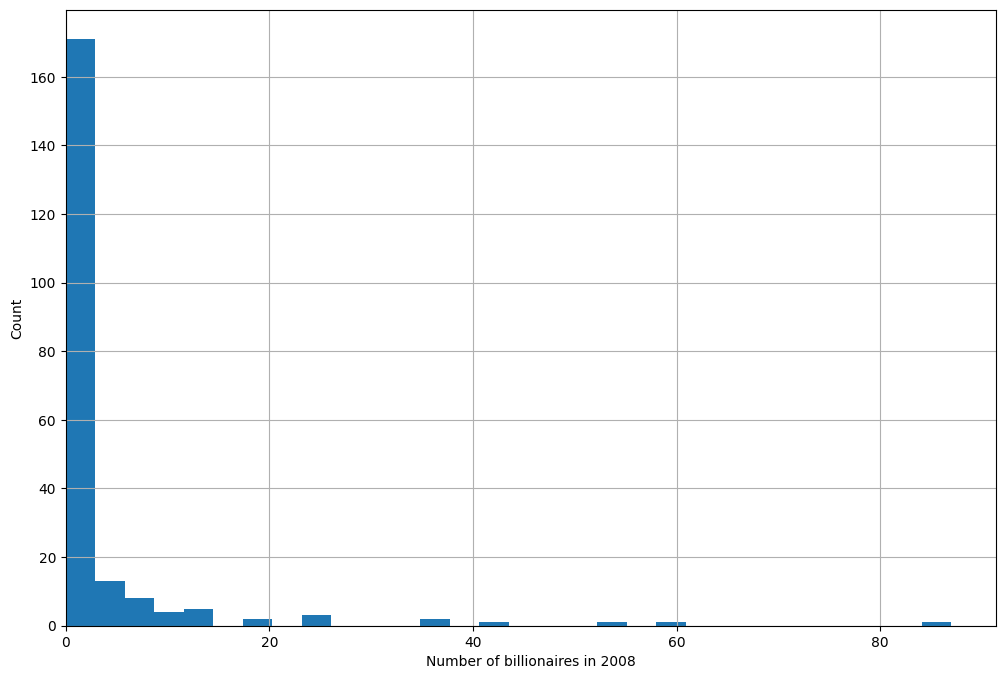

In [19]:
################################################33

plt.subplots(figsize=(12, 8))
plt.hist(numbil0_2008, bins=30)
plt.xlim(left=0)
plt.grid()
plt.xlabel('Number of billionaires in 2008')
plt.ylabel('Count')
plt.show()

From the histogram, it appears that the Poisson assumption is reasonable - albeit with a very low $ \mu $ and some outliers.

## Conditional Distributions

In Treisman’s paper, the dependent variable — the number of billionaires $ y_i $ in country $ i $ — is modeled as a function of GDP per capita, population size, and years membership in GATT and WTO.

Hence, the distribution of $ y_i $ needs to be conditioned on the vector of explanatory variables $ \mathbf{x}_i $.

The standard formulation —  *poisson regression* model:


<a id='equation-poissonreg'></a>
$$
f(y_i \mid \mathbf{x}_i) = \frac{\mu_i^{y_i}}{y_i!} e^{-\mu_i}; \qquad y_i = 0, 1, 2, \ldots , \infty . \tag{2}
$$

$$
\text{where}\ \mu_i
     = \exp(\mathbf{x}_i' \boldsymbol{\beta})
     = \exp(\beta_0 + \beta_1 x_{i1} + \ldots + \beta_k x_{ik})
$$

To illustrate the idea that the distribution of $ y_i $ depends on
$ \mathbf{x}_i $ let’s run a simple simulation.


In [20]:
y_values = range(0, 20)
β = np.array([0.26, 0.18, 0.25, -0.1, -0.22])
datasets = [np.array([0, 1, 1, 1, 2]),
            np.array([2, 3, 2, 4, 0]),
            np.array([3, 4, 5, 3, 2]),
            np.array([6, 5, 4, 4, 7])]

We use our `poisson_pmf` function from above and arbitrary values for
$ \boldsymbol{\beta} $ and $ \mathbf{x}_i $

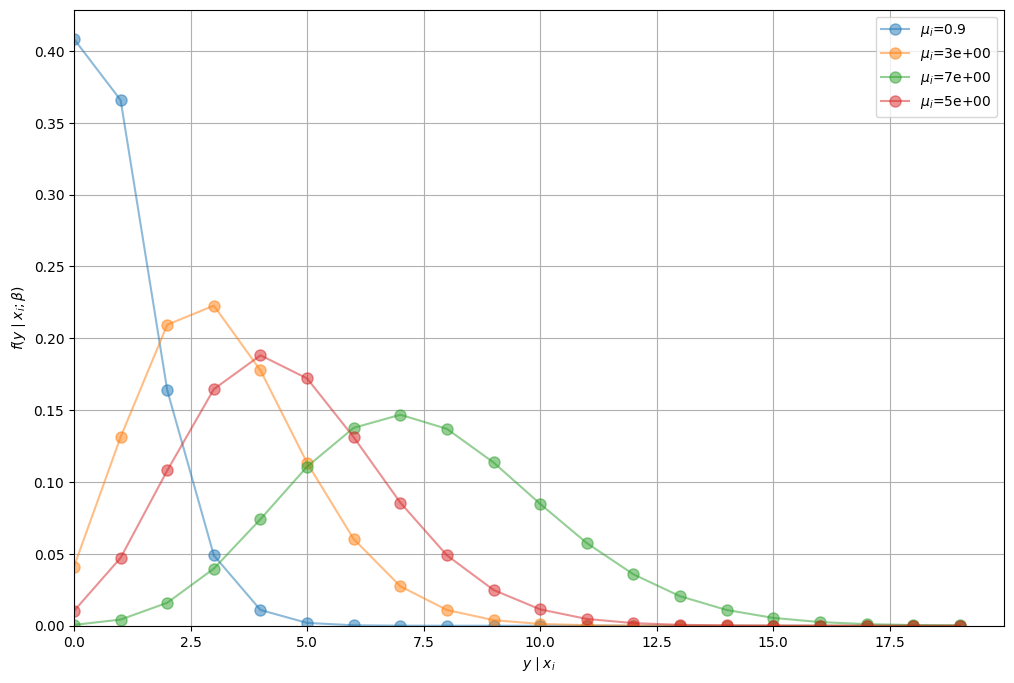

In [23]:
#####################################
fig, ax = plt.subplots(figsize=(12, 8))
                                
for X in datasets:
    μ = exp(X @ β)
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(y_i, μ))
    ax.plot(y_values,
            distribution,
            label=f'$\mu_i$={μ:.1}',
            marker='o',
            markersize=8,
            alpha=0.5)
    
##############################################
ax.grid()
ax.legend()
ax.set_xlabel('$y \mid x_i$')
ax.set_ylabel(r'$f(y \mid x_i; \beta )$')
ax.axis(xmin=0, ymin=0)
plt.show()

```{admonition} Question
:class: important

Is $ y_i $ conditional on $ \mathbf{x}_i $?
```

## Estimate the model using MLE

In model for number of billionaires, the conditional distribution
contains $ k = 4 $ parameters that need to be estimated.

Label entire parameter vector as $ \boldsymbol{\beta} $:

$$
\boldsymbol{\beta} = \begin{bmatrix}
                            \beta_0 \\
                            \beta_1 \\
                            \beta_2 \\
                            \beta_3
                      \end{bmatrix}
$$

To estimate the model using MLE, we want to maximize the likelihood that
our estimate $ \hat{\boldsymbol{\beta}} $ is the true parameter $ \boldsymbol{\beta} $, in other words find the $ \hat{\boldsymbol{\beta}} $ that best fits data.


<span style="display:none" id="quiz_mle_six">W3sicXVlc3Rpb24iOiAiU2VsZWN0IHRoZSBrZXkgY29tcG9uZW50cyBvZiBNTEUiLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIkxpa2VsaWhvb2QgRnVuY3Rpb24iLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICIgVGhlIGxpa2VsaWhvb2QgZnVuY3Rpb24sIGRlbm90ZWQgYnkgJEwoXHUwM2I4IHwgRCkkLCBpcyBhIGZ1bmN0aW9uIG9mIHRoZSBtb2RlbCBwYXJhbWV0ZXJzICRcdTAzYjgkIGFuZCB0aGUgb2JzZXJ2ZWQgZGF0YSAkRCQuIn0sIHsiYW5zd2VyIjogIkxvZy1MaWtlbGlob29kIEZ1bmN0aW9uIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiVGFraW5nIHRoZSBsb2dhcml0aG0gbWFrZXMgY29tcHV0YXRpb25zIGVhc2llciBhbmQgaGVscHMgcHJldmVudCBudW1lcmljYWwgdW5kZXJmbG93IGZvciBsYXJnZSBkYXRhc2V0cy4ifSwgeyJhbnN3ZXIiOiAiQmF5ZXNpYW4gZXN0aW1hdGlvbiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJCYXllc2lhbiBFc3RpbWF0aW9uIGludm9sdmVzIGluY29ycG9yYXRpbmcgcHJpb3IgaW5mb3JtYXRpb24gaW50byB0aGUgZXN0aW1hdGlvbiBwcm9jZXNzLCB3aGljaCBpcyBkaWZmZXJlbnQgZnJvbSB0aGUgZnJlcXVlbnRpc3QgYXBwcm9hY2ggb2YgTUxFLiJ9LCB7ImFuc3dlciI6ICJNTEUgT2JqZWN0aXZlIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiVGhlIE1MRSBvYmplY3RpdmUgaXMgdG8gZmluZCB0aGUgcGFyYW1ldGVyIHZhbHVlcyAkXHUwM2I4JCB0aGF0IG1heGltaXplIHRoZSBsb2ctbGlrZWxpaG9vZCBmdW5jdGlvbjoifSwgeyJhbnN3ZXIiOiAiQ2VudHJhbCBMaW1pdCBUaGVvcmVtIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIldoaWxlIHRoZSBDZW50cmFsIExpbWl0IFRoZW9yZW0gaXMgaW1wb3J0YW50IGluIHN0YXRpc3RpY3MsIGl0J3Mgbm90IGEga2V5IGNvbXBvbmVudCBvZiBNTEUsIHdoaWNoIGZvY3VzZXMgb24gZmluZGluZyBwYXJhbWV0ZXIgdmFsdWVzIHRoYXQgbWF4aW1pemUgdGhlIGxpa2VsaWhvb2QgZnVuY3Rpb24uIn0sIHsiYW5zd2VyIjogIkhlc3NpYW4gTWF0cml4IiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkl0IGNvbWVzIGludG8gcGxheSB3aGVuIGFzc2Vzc2luZyB0aGUgdmFyaWFuY2Ugb2YgdGhlIHBhcmFtZXRlciBlc3RpbWF0ZXMuIn1dfV0=</span>

In [24]:
from jupyterquiz import display_quiz
display_quiz("#quiz_mle_six")

<IPython.core.display.Javascript object>

First step is constucting the **likelihood function** $ \mathcal{L}(\boldsymbol{\beta}) $, which is similar to a joint probability density function.

Let data $ y_i = \{y_1, y_2\} $ and
$ y_i \sim f(y_i) $.

If $ y_1 $ and $ y_2 $ are independent, the joint pmf of these
data is $ f(y_1, y_2) = f(y_1) \cdot f(y_2) $.

If $ y_i $ follows a Poisson distribution, joint pmf with $ \lambda = 7 $:

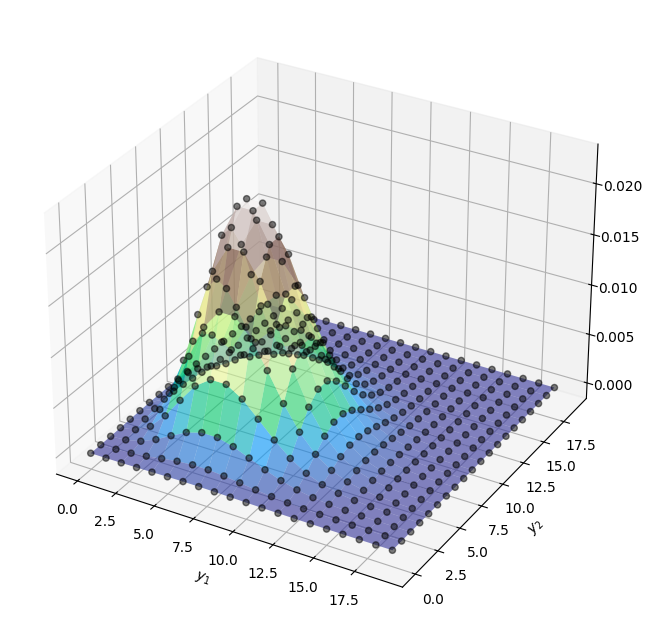

In [25]:
###########################################################
def plot_joint_poisson(μ=7, y_n=20):
    yi_values = np.arange(0, y_n, 1)

    # Create coordinate points of X and Y
    X, Y = np.meshgrid(yi_values, yi_values)

    # Multiply distributions together
    Z = poisson_pmf(X, μ) * poisson_pmf(Y, μ)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z.T, cmap='terrain', alpha=0.6)
    ax.scatter(X, Y, Z.T, color='black', alpha=0.5, linewidths=1)
    ax.set(xlabel='$y_1$', ylabel='$y_2$')
    ax.set_zlabel('$f(y_1, y_2)$', labelpad=10)
    plt.show()

plot_joint_poisson(μ=7, y_n=20)

Similarly, the joint pmf of our data (which is distributed as a
conditional Poisson distribution) can be written as

$$
f(y_1, y_2, \ldots, y_n \mid \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n; \boldsymbol{\beta})
    = \prod_{i=1}^{n} \frac{\mu_i^{y_i}}{y_i!} e^{-\mu_i}
$$

$ y_i $ is conditional on both the values of $ \mathbf{x}_i $ and the
parameters $ \boldsymbol{\beta} $.

The likelihood function is the same as the joint pmf, but treats the
parameter $ \boldsymbol{\beta} $ as a random variable and takes the observations
$ (y_i, \mathbf{x}_i) $ as given

$$
\begin{split}
\mathcal{L}(\beta \mid y_1, y_2, \ldots, y_n \ ; \ \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n) = &
\prod_{i=1}^{n} \frac{\mu_i^{y_i}}{y_i!} e^{-\mu_i} \\ = &
f(y_1, y_2, \ldots, y_n \mid  \ \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_n ; \beta)
\end{split}
$$

Now that we have our likelihood function, we want to find the $ \hat{\boldsymbol{\beta}} $ that yields the maximum likelihood value

$$
\underset{\boldsymbol{\beta}}{\max} \mathcal{L}(\boldsymbol{\beta})
$$



```{note}
It is generally easier to maximize the log-likelihood - consider
differentiating $ f(x) = x \exp(x) $  vs.  $ f(x) = \log(x) + x $.
```

A maximizer of the likelihood function will also be a maximizer of the log-likelihood function.

<span style="display:none" id="quiz_mle_log">W3sicXVlc3Rpb24iOiAiV2hhdCBkb2VzIHRoZSBsb2ctbGlrZWxpaG9vZCBsb29rIGxpa2UgaW4gb3VyIGNhc2UgJCRcXGxvZ3tcXG1hdGhjYWx7TH19KFxcYm9sZHN5bWJvbHtcXGJldGF9KSA9IFxcbG9nIFxcQmlnKGYoeV8xIDsgXFxib2xkc3ltYm9se1xcYmV0YX0pIFxcY2RvdCBmKHlfMiA7IFxcYm9sZHN5bWJvbHtcXGJldGF9KSBcXGNkb3QgXFxsZG90cyBcXGNkb3QgZih5X24gOyBcXGJvbGRzeW1ib2x7XFxiZXRhfSkgXFxCaWcpID0gPyQkIiwgInR5cGUiOiAibXVsdGlwbGVfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiJCRcXHN1bV97aT0xfV57bn0geV9pIFxcbG9ne1xcbXVfaX0gLSBcXHN1bV97aT0xfV57bn0gXFxtdV9pIC0gXFxzdW1fe2k9MX1ee259IFxcbG9ne3lfaSF9JCQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISBUaGlzIHJlcHJlc2VudHMgdGhlIGxvZy1saWtlbGlob29kIGZvciB0aGUgZ2l2ZW4gc2V0IG9mIG9ic2VydmF0aW9ucyBhbmQgbWVhbiBwcmVkaWN0aW9ucy4ifSwgeyJhbnN3ZXIiOiAiJCRcXHN1bV97aT0xfV57bn0gXFxtdV9pIFxcbG9ne3lfaX0gLSBcXHN1bV97aT0xfV57bn0geV9pIC0gXFxzdW1fe2k9MX1ee259IFxcbG9ne1xcbXVfaSF9JCQiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGlzIGRvZXNuJ3QgY29ycmVjdGx5IHJlcHJlc2VudCB0aGUgbG9nLWxpa2VsaWhvb2QgaW4gdGhlIGNvbnRleHQgb2YgTUxFLiJ9LCB7ImFuc3dlciI6ICIkJFxcc3VtX3tpPTF9XntufSB5X2kgXFxsb2d7XFxtdV9pfSArIFxcc3VtX3tpPTF9XntufSBcXG11X2kgLSBcXHN1bV97aT0xfV57bn0gXFxsb2d7eV9pIX0kJCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QuIFRoaXMgZG9lc24ndCBhY2N1cmF0ZWx5IGRlcGljdCB0aGUgbG9nLWxpa2VsaWhvb2QgaW4gdGhlIGNvbnRleHQgb2YgTUxFLiJ9LCB7ImFuc3dlciI6ICIkJFxcc3VtX3tpPTF9XntufSBcXG11X2kgXFxsb2d7eV9pfSArIFxcc3VtX3tpPTF9XntufSB5X2kgLSBcXHN1bV97aT0xfV57bn0gXFxsb2d7XFxtdV9pIX0kJCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QuIFRoaXMgZG9lc24ndCBjb3JyZWN0bHkgcmVwcmVzZW50IHRoZSBsb2ctbGlrZWxpaG9vZCBpbiB0aGUgY29udGV4dCBvZiBNTEUuIn1dfV0=</span>


In [26]:
from jupyterquiz import display_quiz
display_quiz("#quiz_mle_log")

<IPython.core.display.Javascript object>

The MLE of the Poisson to the Poisson  for $ \hat{\beta} $ can be obtained by solving

$$
\underset{\beta}{\max} \Big(
\sum_{i=1}^{n} y_i \log{\mu_i} -
\sum_{i=1}^{n} \mu_i -
\sum_{i=1}^{n} \log y! \Big)
$$

```{warning}
No analytical solution exists to the above problem – to find the MLE use numerical methods.
```

## MLE with Numerical Methods

One numerical method is the **Newton-Raphson algorithm.**

At $ \hat{\boldsymbol{\beta}} $, the first derivative of the log-likelihood
function will be equal to 0.

The Newton-Raphson algorithm finds a point where the first derivative is
0.

To use the algorithm, we take an initial guess at the maximum value,
$ \beta_0 $ (the OLS parameter estimates might be a reasonable
guess), then

1. Use the updating rule to iterate the algorithm  
  $$
  \boldsymbol{\beta}_{(k+1)} = \boldsymbol{\beta}_{(k)} - H^{-1}(\boldsymbol{\beta}_{(k)})G(\boldsymbol{\beta}_{(k)})
  $$
  where:  
  $$
  \begin{aligned}
     G(\boldsymbol{\beta}_{(k)}) = \frac{d \log \mathcal{L(\boldsymbol{\beta}_{(k)})}}{d \boldsymbol{\beta}_{(k)}} \\
     H(\boldsymbol{\beta}_{(k)}) = \frac{d^2 \log \mathcal{L(\boldsymbol{\beta}_{(k)})}}{d \boldsymbol{\beta}_{(k)}d \boldsymbol{\beta}'_{(k)}}
     \end{aligned}
  $$
1. Check whether $ \boldsymbol{\beta}_{(k+1)} - \boldsymbol{\beta}_{(k)} < tol $  
  - If true, then stop iterating and set
    $ \hat{\boldsymbol{\beta}} = \boldsymbol{\beta}_{(k+1)} $  
  - If false, then update $ \boldsymbol{\beta}_{(k+1)} $  


As can be seen from the updating equation,
$ \boldsymbol{\beta}_{(k+1)} = \boldsymbol{\beta}_{(k)} $ only when
$ G(\boldsymbol{\beta}_{(k)}) = 0 $ ie. where the first derivative is equal to 0.

```{note}
Stop iterating when the difference is below a small
tolerance threshold.
```



Let’s implement the Newton-Raphson algorithm. First, create a class for Poisson regression model (further, `PoissonRegression`), so we can easily recompute the values of the log likelihood, gradient and Hessian for every iteration

In [27]:
#####################################################################################################

class PoissonRegression:

    def __init__(self, y, X, β):
        self.X = X
        self.n, self.k = X.shape
        self.y = y.reshape(self.n,1)
        self.β = β.reshape(self.k,1)

    def μ(self):
        return np.exp(self.X @ self.β)

    def logL(self):
        y = self.y
        μ = self.μ()
        return np.sum(y * np.log(μ) - μ - np.log(factorial(y)))

    def G(self):
        y = self.y
        μ = self.μ()
        return X.T @ (y - μ)

    def H(self):
        X = self.X
        μ = self.μ()
        return -(X.T @ (μ * X))

Our function `newton_raphson` will take a `PoissonRegression` object
that has an initial guess of the parameter vector $ \boldsymbol{\beta}_0 $.

The algorithm will update the parameter vector according to the updating
rule, and recalculate the gradient and Hessian matrices at the new
parameter estimates.

In [28]:
########################################################################################
#Iteration will end when either:
#- The difference between the parameter and the updated parameter is below a tolerance level.
#- The maximum number of iterations has been achieved (meaning convergence is not achieved).
#So we can get an idea of what’s going on while the algorithm is running,
#an option `display=True` is added to print out values at each
#iteration.
def newton_raphson(model, tol=1e-3, max_iter=1000, display=True):

    i = 0
    error = 100
    if display:
        header = f'{"Iteration_k":<13}{"Log-likelihood":<16}{"θ":<60}'
        print(header)
        print("-" * len(header))


    while np.any(error > tol) and i < max_iter:
        H, G = model.H(), model.G()
        β_new = model.β - (np.linalg.inv(H) @ G)
        error = np.abs(β_new - model.β)
        model.β = β_new

        if display:
            β_list = [f'{t:.3}' for t in list(model.β.flatten())]
            update = f'{i:<13}{model.logL():<16.8}{β_list}'
            print(update)

        i += 1

    print(f'Number of iterations: {i}')
    print(f'β_hat = {model.β.flatten()}')
    return model.β.flatten()

Let’s try out our algorithm with a small dataset of 5 observations and 3
variables in $ \mathbf{X} $.

In [29]:
X = np.array([[1, 2, 5],
              [1, 1, 3],
              [1, 4, 2],
              [1, 5, 2],
              [1, 3, 1]])
y = np.array([1, 0, 1, 1, 0])
init_β = np.array([0.1, 0.1, 0.1])

poi = PoissonRegression(y, X, β=init_β)
β_hat = newton_raphson(poi, display=True)

Iteration_k  Log-likelihood  θ                                                           
-----------------------------------------------------------------------------------------
0            -4.3447622      ['-1.49', '0.265', '0.244']
1            -3.5742413      ['-3.38', '0.528', '0.474']
2            -3.3999526      ['-5.06', '0.782', '0.702']
3            -3.3788646      ['-5.92', '0.909', '0.82']
4            -3.3783559      ['-6.07', '0.933', '0.843']
5            -3.3783555      ['-6.08', '0.933', '0.843']
6            -3.3783555      ['-6.08', '0.933', '0.843']
Number of iterations: 7
β_hat = [-6.07848573  0.9334028   0.84329677]


```{admonition} The increase in $ \log \mathcal{L}(\boldsymbol{\beta}_{(k)}) $becomes smaller with each iteration.

:class: dropdown

This is because the gradient is approaching 0 as we reach the maximum,
and therefore the numerator in our updating equation is becoming smaller.

The gradient vector should be close to 0 at $ \hat{\boldsymbol{\beta}} $
```

The iterative process is visualized in the following diagram, where
the maximum is found at $ \beta = 10 $

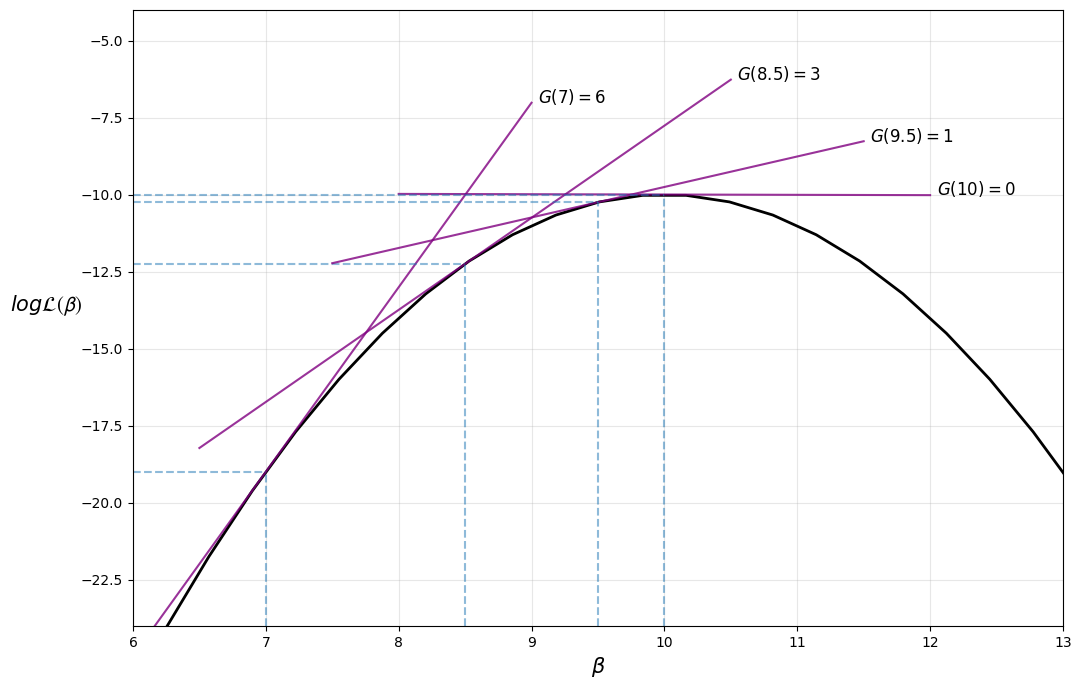

In [30]:
#########################################################################33
logL = lambda x: -(x - 10) ** 2 - 10

def find_tangent(β, a=0.01):
    y1 = logL(β)
    y2 = logL(β+a)
    x = np.array([[β, 1], [β+a, 1]])
    m, c = np.linalg.lstsq(x, np.array([y1, y2]), rcond=None)[0]
    return m, c

β = np.linspace(2, 18)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(β, logL(β), lw=2, c='black')

for β in [7, 8.5, 9.5, 10]:
    β_line = np.linspace(β-2, β+2)
    m, c = find_tangent(β)
    y = m * β_line + c
    ax.plot(β_line, y, '-', c='purple', alpha=0.8)
    ax.text(β+2.05, y[-1], f'$G({β}) = {abs(m):.0f}$', fontsize=12)
    ax.vlines(β, -24, logL(β), linestyles='--', alpha=0.5)
    ax.hlines(logL(β), 6, β, linestyles='--', alpha=0.5)

ax.set(ylim=(-24, -4), xlim=(6, 13))
ax.set_xlabel(r'$\beta$', fontsize=15)
ax.set_ylabel(r'$log \mathcal{L(\beta)}$',
               rotation=0,
               labelpad=25,
               fontsize=15)
ax.grid(alpha=0.3)
plt.show()


```{warning}
Implementation of the Newton-Raphson algorithm is rather
basic —  for more robust implementations see, `[scipy.optimize]`(https://docs.scipy.org/doc/scipy/reference/optimize.html).
```

## MLE with statsmodels

`statsmodels` uses the same algorithm as above to find the maximum
likelihood estimates.

Let’s replicate results from Daniel Treisman’s paper, [Russia’s
Billionaires](https://www.aeaweb.org/articles?id=10.1257/aer.p20161068).

Treisman starts by estimating equation [(2)](#equation-poissonreg), where:

- $ y_i $ is $ {number\ of\ billionaires}_i $  
- $ x_{i1} $ is $ \log{GDP\ per\ capita}_i $  
- $ x_{i2} $ is $ \log{population}_i $  
- $ x_{i3} $ is $ {years\ in\ GATT}_i $ – years membership in GATT and WTO (to proxy access to international markets)  

In [31]:
###########################################################################
df = df[df['year'] == 2008]
df['const'] = 1
reg1 = ['const', 'lngdppc', 'lnpop', 'gattwto08']
reg2 = ['const', 'lngdppc', 'lnpop',
        'gattwto08', 'lnmcap08', 'rintr', 'topint08']
reg3 = ['const', 'lngdppc', 'lnpop', 'gattwto08', 'lnmcap08',
        'rintr', 'topint08', 'nrrents', 'roflaw']

Use the `Poisson` function from `statsmodels` to fit the
model.

In [32]:
poisson_reg = sm.Poisson(df[['numbil0']], df[reg1],
                         missing='drop').fit(cov_type='HC0')
print(poisson_reg.summary())

Optimization terminated successfully.
         Current function value: 2.226090
         Iterations 9
                          Poisson Regression Results                          
Dep. Variable:                numbil0   No. Observations:                  197
Model:                        Poisson   Df Residuals:                      193
Method:                           MLE   Df Model:                            3
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                  0.8574
Time:                        11:27:46   Log-Likelihood:                -438.54
converged:                       True   LL-Null:                       -3074.7
Covariance Type:                  HC0   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.0495      2.578    -11.268      0.000     -34.103     -23.997
lngdppc        1.0839      0.

Success! Output indicates that GDP per capita, population, and years of
membership in the General Agreement on Tariffs and Trade (GATT) are
positively related to the number of billionaires a country has, as
expected.

Let’s also estimate the author’s more full-featured models and display
them in a single table

In [33]:
############################################################
regs = [reg1, reg2, reg3]
reg_names = ['Model 1', 'Model 2', 'Model 3']
info_dict = {'Pseudo R-squared': lambda x: f"{x.prsquared:.2f}",
             'No. observations': lambda x: f"{int(x.nobs):d}"}
regressor_order = ['const',
                   'lngdppc',
                   'lnpop',
                   'gattwto08',
                   'lnmcap08',
                   'rintr',
                   'topint08',
                   'nrrents',
                   'roflaw']
results = []

for reg in regs:
    result = sm.Poisson(df[['numbil0']], df[reg],
                        missing='drop').fit(cov_type='HC0',
                                            maxiter=100, disp=0)
    results.append(result)

results_table = summary_col(results=results,
                            float_format='%0.3f',
                            stars=True,
                            model_names=reg_names,
                            info_dict=info_dict,
                            regressor_order=regressor_order)
results_table.add_title('Table 1 - Explaining the Number of Billionaires \
                        in 2008')
print(results_table)

Table 1 - Explaining the Number of Billionaires                         in 2008
                  Model 1    Model 2    Model 3  
-------------------------------------------------
const            -29.050*** -19.444*** -20.858***
                 (2.578)    (4.820)    (4.255)   
lngdppc          1.084***   0.717***   0.737***  
                 (0.138)    (0.244)    (0.233)   
lnpop            1.171***   0.806***   0.929***  
                 (0.097)    (0.213)    (0.195)   
gattwto08        0.006      0.007      0.004     
                 (0.007)    (0.006)    (0.006)   
lnmcap08                    0.399**    0.286*    
                            (0.172)    (0.167)   
rintr                       -0.010     -0.009    
                            (0.010)    (0.010)   
topint08                    -0.051***  -0.058*** 
                            (0.011)    (0.012)   
nrrents                                -0.005    
                                       (0.010)   
roflaw              

<span style="display:none" id="quiz_mle_stat">W3sicXVlc3Rpb24iOiAiV2hhdCBkb2VzIHRoZSBvdXRwdXQgc3VnZ2VzdCBhYm91dCB0aGUgcmVsYXRpb25zaGlwIGJldHdlZW4gdGhlIGZyZXF1ZW5jeSBvZiBiaWxsaW9uYWlyZXMgYW5kIHRoZSBtZW50aW9uZWQgZmFjdG9ycz8iLCAidHlwZSI6ICJtdWx0aXBsZV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJQb3NpdGl2ZWx5IGNvcnJlbGF0ZWQgd2l0aCBHRFAgcGVyIGNhcGl0YSwgcG9wdWxhdGlvbiBzaXplLCBhbmQgc3RvY2sgbWFya2V0IGNhcGl0YWxpemF0aW9uOyIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIn0sIHsiYW5zd2VyIjogIk5lZ2F0aXZlbHkgY29ycmVsYXRlZCB3aXRoIHN0b2NrIG1hcmtldCBjYXBpdGFsaXphdGlvbiBhbmQgdG9wIG1hcmdpbmFsIGluY29tZSB0YXggcmF0ZS4iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiJ9LCB7ImFuc3dlciI6ICJQb3NpdGl2ZWx5IGNvcnJlbGF0ZWQgd2l0aCBzdG9jayBtYXJrZXQgY2FwaXRhbGl6YXRpb24gYW5kIHRvcCBtYXJnaW5hbCBpbmNvbWUgdGF4IHJhdGUuIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4ifSwgeyJhbnN3ZXIiOiAiTmVnYXRpdmVseSBjb3JyZWxhdGVkIHdpdGggdG9wIG1hcmdpbmFsIGluY29tZSB0YXggcmF0ZS4iLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0IS4ifV19XQ==</span>

In [34]:
from jupyterquiz import display_quiz
display_quiz("#quiz_mle_stat")

<IPython.core.display.Javascript object>

Plot the difference between the predicted an actual values, then sort from highest to lowest and plot the first 15 to analyze results by country.

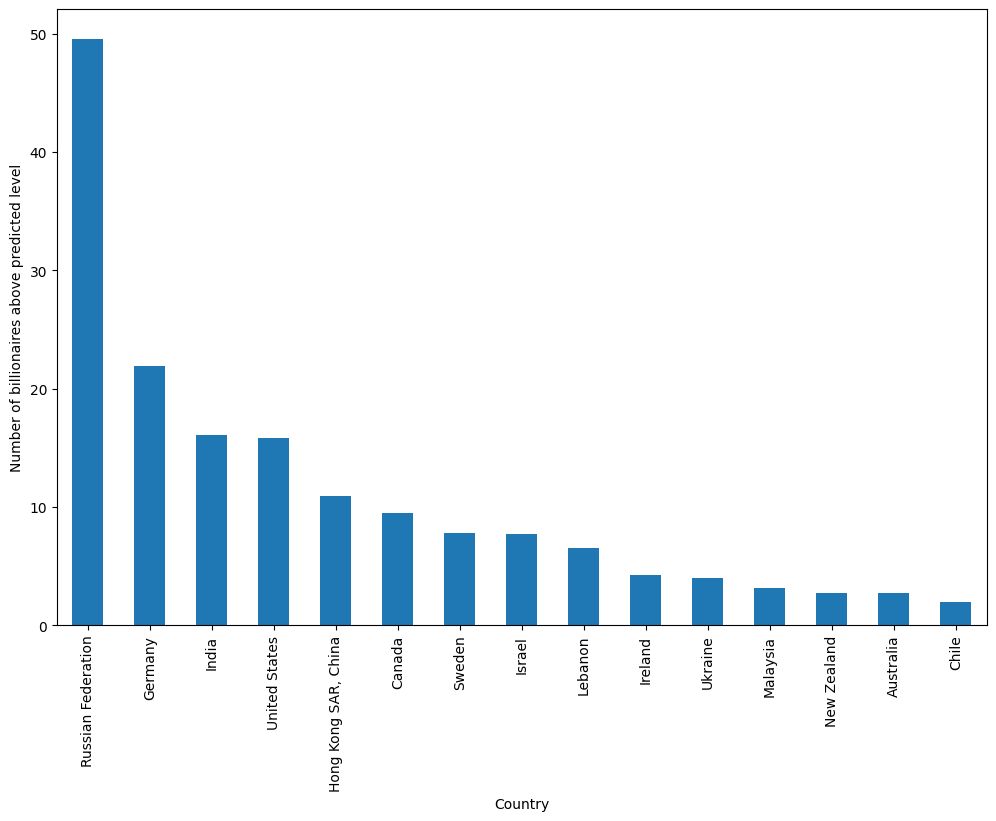

In [35]:
#############################################
data = ['const', 'lngdppc', 'lnpop', 'gattwto08', 'lnmcap08', 'rintr',
        'topint08', 'nrrents', 'roflaw', 'numbil0', 'country']
results_df = df[data].dropna()

# Use last model (model 3)
results_df['prediction'] = results[-1].predict()

# Calculate difference
results_df['difference'] = results_df['numbil0'] - results_df['prediction']

# Sort in descending order
results_df.sort_values('difference', ascending=False, inplace=True)

# Plot the first 15 data points
results_df[:15].plot('country', 'difference', kind='bar',
                    figsize=(12,8), legend=False)
plt.ylabel('Number of billionaires above predicted level')
plt.xlabel('Country')
plt.show()

As we can see, Russia has by far the highest number of billionaires in
excess of what is predicted by the model (around 50 more than expected).

Suppose we wanted to estimate the probability of an event $ y_i $
occurring, given some observations.

We could use a probit regression model, where the pmf of $ y_i $ is

$$
\begin{aligned}
f(y_i; \boldsymbol{\beta}) = \mu_i^{y_i} (1-\mu_i)^{1-y_i}, \quad y_i = 0,1 \\
\text{where} \quad \mu_i = \Phi(\mathbf{x}_i' \boldsymbol{\beta})
\end{aligned}
$$




````{admonition} Question
:class: important
Find the log-likelihood function.

```{admonition} Answer
:class: tip, dropdown

$$
\log \mathcal{L} = \sum_{i=1}^n
\big[
y_i \log \Phi(\mathbf{x}_i' \boldsymbol{\beta}) +
(1 - y_i) \log (1 - \Phi(\mathbf{x}_i' \boldsymbol{\beta})) \big]
$$

```
````


````{admonition} Question
:class: important

Derive the gradient and Hessian.

```{admonition} Answer
:class: tip, dropdown

$$
\frac{ \partial} {\partial s} \Phi(s) = \phi(s)
$$

where $ \phi $ is the marginal normal distribution.

The gradient vector of the Probit model is

$$
\frac {\partial \log \mathcal{L}} {\partial \boldsymbol{\beta}} =
\sum_{i=1}^n \Big[
y_i \frac{\phi(\mathbf{x}'_i \boldsymbol{\beta})}{\Phi(\mathbf{x}'_i \boldsymbol{\beta)}} -
(1 - y_i) \frac{\phi(\mathbf{x}'_i \boldsymbol{\beta)}}{1 - \Phi(\mathbf{x}'_i \boldsymbol{\beta)}}
\Big] \mathbf{x}_i
$$

The Hessian of the Probit model is

$$
\frac {\partial^2 \log \mathcal{L}} {\partial \boldsymbol{\beta} \partial \boldsymbol{\beta}'} =
-\sum_{i=1}^n \phi (\mathbf{x}_i' \boldsymbol{\beta})
\Big[
y_i \frac{ \phi (\mathbf{x}_i' \boldsymbol{\beta}) + \mathbf{x}_i' \boldsymbol{\beta} \Phi (\mathbf{x}_i' \boldsymbol{\beta}) } { [\Phi (\mathbf{x}_i' \boldsymbol{\beta})]^2 } +
(1 - y_i) \frac{ \phi (\mathbf{x}_i' \boldsymbol{\beta}) - \mathbf{x}_i' \boldsymbol{\beta} (1 - \Phi (\mathbf{x}_i' \boldsymbol{\beta})) } { [1 - \Phi (\mathbf{x}_i' \boldsymbol{\beta})]^2 }
\Big]
\mathbf{x}_i \mathbf{x}_i'
$$
```
````